In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

In [3]:
aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [4]:
dur = 500.
t_pen = 0.6

In [5]:
file_ = '1_E.pickle'
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = '1'

/adaptation_excursion


In [6]:
dur_pre = 10
dur_post = 100

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]
c_var = [0]
#wp = 1. / (dur * t_pen[1] - t_pen[0] * dur)
wp = 1. / (dur - t_pen*dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [7]:
bestControl_ = None

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]

file found


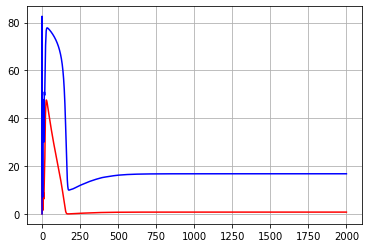

In [8]:
# get initial parameters and target states

aln.params.sigma_ou = 0.

aln.params.duration = 2000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

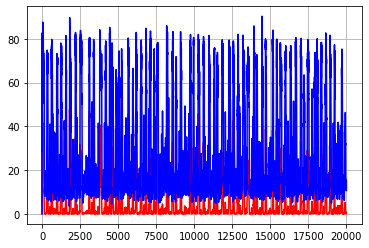

21.986651783821888
69.19533764699759


In [9]:
aln.params.sigma_ou = 0.1

aln.params.duration = 20000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

e_ = []
i_ = []
t_ind = []

for t in range(len(aln.t)):
    
    if aln.rates_exc[0,t] < 10:
        continue
    if aln.rates_inh[0,t] < 50:
        continue
    
    t_ind.append(t)
    e_.append(aln.rates_exc[0,t])
    i_.append(aln.rates_inh[0,t])
    
print(np.mean(e_))
print(np.mean(i_))

target = np.zeros((2))
target[0] = np.mean(e_)
target[1] = np.mean(i_)

set cost params:  0.005 0.0 0.0
interpolate adjoint :  True True True
initial cost =  225.28220219413907
RUN  0 , total integrated cost =  225.28220219413907
Gradient descend method:  None
RUN  0 , total integrated cost =  225.28220219413907
Improved over  0  iterations in  0.0  seconds by  0.0  percent.


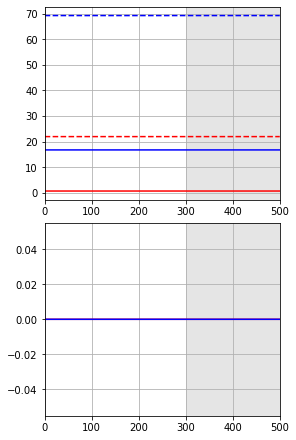

In [10]:
# get uncontrolled cost
    
aln.params.duration = dur
aln.params.sigma_ou = 0.

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

cost.setParams(wp, 0.0, 0.0)

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

setinit(initVars, aln)
control0 = aln.getZeroControl()

cgv = None
max_it = 0

bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_init_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_init_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_init_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_init_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

cost_uncontrolled = cost_init_[0]

set cost params:  0.005 0.0 10.0
interpolate adjoint :  True True True
initial cost =  225.28220219413907
RUN  0 , total integrated cost =  225.28220219413907
Gradient descend method:  None
RUN  1 , total integrated cost =  127.39320969279673
RUN  2 , total integrated cost =  121.01072190214593
RUN  3 , total integrated cost =  116.83879463227314
RUN  4 , total integrated cost =  115.45116157946072
RUN  5 , total integrated cost =  112.97930806811291
RUN  6 , total integrated cost =  111.78109130423448
RUN  7 , total integrated cost =  109.55744547089915
RUN  8 , total integrated cost =  108.59485036983473
RUN  9 , total integrated cost =  106.94115667586527
RUN  10 , total integrated cost =  106.14070457958887
RUN  11 , total integrated cost =  102.80735494892193
RUN  12 , total integrated cost =  102.75996576505281
RUN  13 , total integrated cost =  102.71938141771153
RUN  14 , total integrated cost =  102.67306163032916
RUN  15 , total integrated cost =  102.63232843935488
RUN  16 ,

ERROR:root:Problem in initial value trasfer post


RUN  40 , total integrated cost =  101.95234873674374
RUN  40 , total integrated cost =  101.95234873674374
Improved over  40  iterations in  1.8135812369873747  seconds by  54.74460576833081  percent.
Problem in initial value trasfer post:  Vmean_exc -57.10814097007889 -57.114614424458665


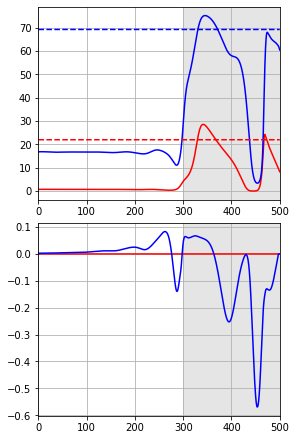

uncontrolled cost :  225.28220219413907
cost splitting :  14883.11114279765 [0.        2.7536793]


In [12]:
cgv = None
j = 0

aln.params.duration = dur
setinit(initVars, aln)

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

control0 = aln.getZeroControl()
cost.setParams(wp, 0., 10.)
max_it = int(40)

#control0[0,0,2400:2500] = 0.5

bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = [1],
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

print('uncontrolled cost : ', cost_uncontrolled)
print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])    

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  77.16923501626368
RUN  0 , total integrated cost =  77.16923501626368
Gradient descend method:  None
RUN  1 , total integrated cost =  63.872155526215224
RUN  2 , total integrated cost =  59.0444309513007
RUN  3 , total integrated cost =  55.48145065106603
RUN  4 , total integrated cost =  53.26193077383887
RUN  5 , total integrated cost =  50.87934054749229
RUN  6 , total integrated cost =  49.5891017424861
RUN  7 , total integrated cost =  48.001850238808366
RUN  8 , total integrated cost =  46.907580484804406
RUN  9 , total integrated cost =  45.583648640286896
RUN  10 , total integrated cost =  44.630261691127174
RUN  11 , total integrated cost =  43.52855521288924
RUN  12 , total integrated cost =  42.67786693724882
RUN  13 , total integrated cost =  41.6612877387377
RUN  14 , total integrated cost =  40.87454990504849
RUN  15 , total integrated cost =  39.79366263331381
RUN  16 , total integrate

ERROR:root:Problem in initial value trasfer post


RUN  1000 , total integrated cost =  3.9531694476754224
RUN  1000 , total integrated cost =  3.9531694476754224
Improved over  1000  iterations in  126.29922140605049  seconds by  94.87727272812504  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63533327491508 -56.638913971048524
cost splitting :  13.817576535667353 [3.88407749e+00 4.07882212e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.9531694476754224
RUN  0 , total integrated cost =  3.9531694476754224
Gradient descend method:  None
RUN  1 , total integrated cost =  3.9531666145917193
RUN  2 , total integrated cost =  3.9531639559147025
RUN  3 , total integrated cost =  3.9531610766660963
RUN  4 , total integrated cost =  3.9531580510860422
RUN  5 , total integrated cost =  3.953155555059919
RUN  6 , total integrated cost =  3.9531529535868097
RUN  7 , total integrated cost =  3.9531502033871706
RUN  8 , total integrated cost =  3.953147677146083
RUN  9 , total integrat

ERROR:root:Problem in initial value trasfer post


Control only changes marginally.
RUN  483 , total integrated cost =  3.9526275606684473
Improved over  483  iterations in  90.87086350697791  seconds by  0.013707659490634683  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63532014463892 -56.63890833202571
cost splitting :  13.811593083892578 [3.88356552e+00 4.07882212e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.9526275606684473
RUN  0 , total integrated cost =  3.9526275606684473
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.9526275606684473
Control only changes marginally.
RUN  1 , total integrated cost =  3.9526275606684473
Improved over  1  iterations in  0.18993504997342825  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63532014463892 -56.63890833202571
cost splitting :  13.811593083892578 [3.88356552e+00 4.07882212e-06]


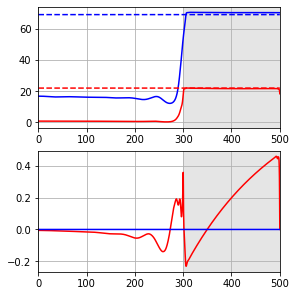

In [13]:
c_var = [0,1]
max_it = int(1000)
conv = False

tol = 1e-6
    
while not conv:

    weight_ = 1.

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[2] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        for k in range(2):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

In [ ]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-8
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8582564298394106
RUN  0 , total integrated cost =  3.8582564298394106
Gradient descend method:  None
RUN  1 , total integrated cost =  3.858252526109613
RUN  2 , total integrated cost =  3.858251378245371
RUN  3 , total integrated cost =  3.8582512501272346
RUN  4 , total integrated cost =  3.8582512472983095
RUN  5 , total integrated cost =  3.85825120794455
RUN  6 , total integrated cost =  3.858251176653016
RUN  7 , total integrated cost =  3.8582511619795703
RUN  8 , total integrated cost =  3.858251139269517
RUN  9 , total integrated cost =  3.8582511365826018


set cost params:  0.05 0.0 454.44560346238933
interpolate adjoint :  True True True
initial cost =  240.33054035348857
RUN  0 , total integrated cost =  240.33054035348857
Gradient descend method:  None
RUN  1 , total integrated cost =  240.33054035348857
Control only changes marginally.
RUN  1 , total integrated cost =  240.33054035348857
Improved over  1  iterations in  0.30353394101257436  seconds by  0.0  percent.
cost splitting :  3.402578243755628e-08 [8.80536580e-13 5.28843361e-01]


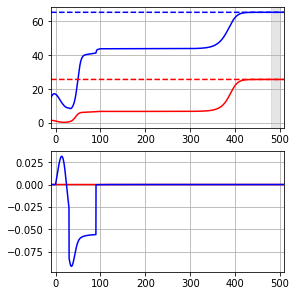

In [26]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-10
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)